In [2]:
import pandas as pd
import os

In [68]:
folder_path = './data/bank'
files = os.listdir(folder_path)
# print(files)

rows = []
for file in files:
    # if file.__contains__('februarie_2023'):
        if file.endswith('.xls') or file.endswith('.xlsx'):
            df = pd.read_excel(f'{folder_path}/{file}', sheet_name=0, header=None)
            rows.append(df)

combined_df = pd.concat(rows, ignore_index=True)

combined_df.loc[10:20]

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Banca:INGB CENTRALA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Detalii:191191064663,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,002103183790,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Referinta:799729969,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14,NaN,02 august 2024,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cumparare POS,...,NaN,NaN,NaN,NaN,NaN,NaN,"240,00",NaN,NaN,NaN
15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Nr. card:**** **** **** 5419,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Terminal:COMPAS COFFEE RO COCOSESTI JU,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Data:31-07-2024 Autorizare: 004672,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18,NaN,02 august 2024,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Retragere numerar valuta,...,NaN,NaN,NaN,NaN,NaN,NaN,"7.506,75",NaN,NaN,NaN
19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Nr. card:**** **** **** 5419,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [172]:
df_ing = pd.DataFrame(
    {
        "Date": combined_df.loc[:, 1],
        "Details": combined_df.loc[:, 9],
        "Debit": combined_df.loc[:, 20],
        "Credit": combined_df.loc[:, 22]
    }
)

DEBIT_DETAILS = ['Plata debit direct', 'Cumparare POS', 'Retragere numerar', 'Transfer Home\'Bank']
CREDIT_DETAILS = ['Incasare', 'Incasare numerar']
# df_ing['Details_Debit'] = df_ing[df_ing['Details'].isin(DEBIT_DETAILS)][['Details']]
# df_ing['Details_Credit'] = df_ing[df_ing['Details'].isin(CREDIT_DETAILS)][['Details']]

MONTHS = {
    'ianuarie': '01',
    'februarie': '02',
    'martie': '03',
    'aprilie': '04',
    'mai': '05',
    'iunie': '06',
    'iulie': '07',
    'august': '08',
    'septembrie': '09',
    'octombrie': '10',
    'noiembrie': '11',
    'decembrie': '12'
}

# keep some underlying cells for payment details
df_ing['Details1'] = df_ing['Details'].shift(-1)
df_ing['Details2'] = df_ing['Details'].shift(-2)

# remove rows with no debit or credit
df_ing = df_ing[df_ing['Debit'].notnull() | df_ing['Credit'].notnull()].fillna(0)

# normalize date (02 aprilie 2023 -> 2023-04-02)
df_ing['Year'] = df_ing['Date'].str.split(' ').str[2]
df_ing['MonthStr'] = df_ing['Date'].str.split(' ').str[1]
df_ing['Month'] = df_ing['MonthStr'].map(MONTHS)
df_ing['Day'] = df_ing['Date'].str.split(' ').str[0]
df_ing['Date'] = pd.to_datetime(df_ing['Year'] + '-' + df_ing['Month'] + '-' + df_ing['Day'])
df_ing.drop(columns=['Year', 'MonthStr', 'Month', 'Day'], inplace=True)

# save all combined data for easier future parsing
df_ing.sort_values(by='Date', inplace=True)
df_ing.to_csv('./data/ing.csv', index=False)

In [66]:
bank = pd.read_csv('./data/ing.csv')
bank.head(5)

,Date,Details,Debit,Credit,Details1,Details2
0,2023-02-01,Retragere numerar,"5.000,00",0,Nr. card:**** **** **** 0509,Terminal:5548 ING OFFICE PH CANTAC RO PLOIESTI
1,2023-02-02,Cumparare POS,"50,00",0,Nr. card:**** **** **** 0509,Terminal:KAUFLAND 4100 PLOIESTI RO PLOIESTI
2,2023-02-02,Cumparare POS,"60,19",0,Nr. card:**** **** **** 0509,Terminal:KAUFLAND 4100 PLOIESTI RO PLOIESTI
3,2023-02-09,Cumparare POS,"75,00",0,Nr. card:**** **** **** 0509,Terminal:IONITA IRENE-BEATRICE INT RO BLEJOI
4,2023-02-09,Cumparare POS,"1.897,00",0,Nr. card:**** **** **** 0509,Terminal:Hotel at Booking.com NL Amsterdam


In [63]:
import locale
locale.setlocale(locale.LC_NUMERIC, 'ro_RO.utf8')

bank['Date'] = pd.to_datetime(bank['Date'])
bank['year'] = bank['Date'].dt.year
bank['month'] = bank['Date'].dt.month
# bank['Debit'] = bank['Debit'].map(locale.atof)
# bank['Credit'] = bank['Credit'].map(locale.atof)


# bank['Details2'].value_counts()
# bank['Kaufland'] = bank['Details2'].apply(lambda x: 'Nord' if '4100' in x else 'Vest' if '1100' in x else '-')
bank['Kaufland'] = bank['Details2'].apply(lambda x: 'Nord' if pd.Series(x).str.contains(r' 4100 ').any() else 'Vest' if pd.Series(x).str.contains(r' 1100 ').any() else '-')
bank

kaufland = bank[bank['Details2'].str.contains(r'KAUFLAND')].groupby([bank['year'],bank['month'],bank['Kaufland']]).agg({'Debit': 'sum'})
kaufland

Debit
year month Kaufland         
2023 2     Nord      1312.73
     3     Nord       299.44
     4     Nord       529.83
     5     Nord       513.99
     6     Nord       495.06
     7     Nord       232.65
           Vest       664.33
     8     Nord       405.48
     10    Nord      1200.38
     11    Nord      1713.82
     12    Nord       979.83
2024 1     Nord       617.43
     2     Nord      1360.07
     3     Nord      2103.67
     4     Nord      2292.60
     5     Nord      2555.31
           Vest        83.10
     6     Nord       669.88
           Vest        34.69
     7     Nord      1524.04
     8     Nord       977.99
     9     Nord        59.98
           Vest       293.70
     10    Nord       232.29
     11    Nord       849.37
           Vest      2078.74
     12    Nord       570.10
           Vest       991.26

In [64]:
# cat praduim in medie pe luna la Kaufland
kaufland.Debit.mean()

np.float64(915.7771428571428)

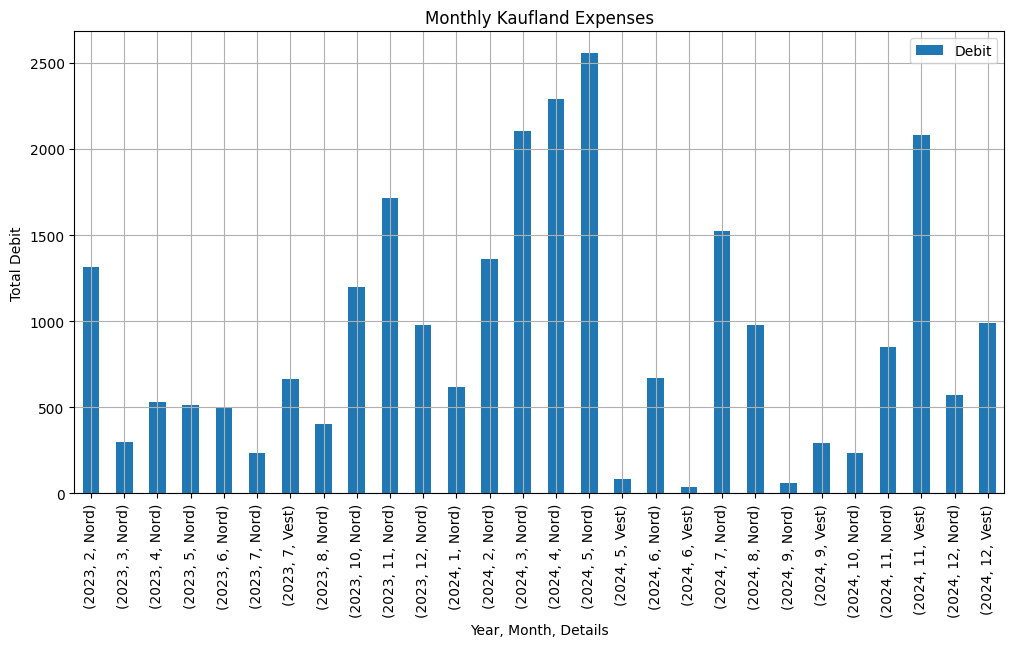

In [65]:
# #%%
import matplotlib.pyplot as plt

# Plotting the Kaufland data
kaufland.plot(kind='bar', figsize=(12, 6))
plt.title('Monthly Kaufland Expenses')
plt.xlabel('Year, Month, Details')
plt.ylabel('Total Debit')
plt.grid(True)
plt.show()